# NYT Data Explorer

Explores the NYT county data.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

The NYT data (3/29) is from https://github.com/nytimes/covid-19-data

In [4]:
df = pd.read_csv('nyt_data/us-counties_0330.csv', parse_dates=['date'])

In [5]:
pa_only = df[df['state']=='Pennsylvania'].reset_index(drop=True)

In [6]:
pa_only

,date,county,state,fips,cases,deaths
0,2020-03-06,Delaware,Pennsylvania,42045.0,1,0
1,2020-03-06,Wayne,Pennsylvania,42127.0,1,0
2,2020-03-07,Delaware,Pennsylvania,42045.0,1,0
3,2020-03-07,Montgomery,Pennsylvania,42091.0,2,0
4,2020-03-07,Wayne,Pennsylvania,42127.0,1,0
...,...,...,...,...,...,...
550,2020-03-29,Warren,Pennsylvania,42123.0,1,0
551,2020-03-29,Washington,Pennsylvania,42125.0,24,0
552,2020-03-29,Wayne,Pennsylvania,42127.0,7,0
553,2020-03-29,Westmoreland,Pennsylvania,42129.0,47,0


In [7]:
surrounding = ['Beaver', 'Butler', 'Armstrong', 'Westmoreland', 'Allegheny', 'Washington', 'Fayette']

In [8]:
near_pgh = pa_only[pa_only['county'].isin(surrounding)].reset_index(drop=True)
near_pgh.drop(columns=['fips'], inplace=True)

In [9]:
near_pgh_summary = near_pgh.groupby(['date']).sum()
near_pgh_summary.index
near_pgh_summary.index.freq='D'
near_pgh_summary.sort_index(inplace=True)

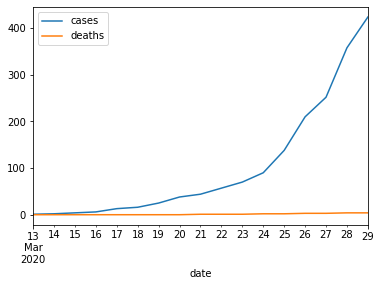

In [10]:
ax = near_pgh_summary.plot()

In [11]:
near_pgh_summary

,cases,deaths
date,,
2020-03-13,1,0
2020-03-14,2,0
2020-03-15,4,0
2020-03-16,6,0
2020-03-17,13,0
2020-03-18,16,0
2020-03-19,25,0
2020-03-20,38,0
2020-03-21,44,1


In [12]:
pa_only[pa_only['county']=='Allegheny'].reset_index(drop=True)

,date,county,state,fips,cases,deaths
0,2020-03-14,Allegheny,Pennsylvania,42003.0,1,0
1,2020-03-15,Allegheny,Pennsylvania,42003.0,3,0
2,2020-03-16,Allegheny,Pennsylvania,42003.0,5,0
3,2020-03-17,Allegheny,Pennsylvania,42003.0,10,0
4,2020-03-18,Allegheny,Pennsylvania,42003.0,12,0
5,2020-03-19,Allegheny,Pennsylvania,42003.0,18,0
6,2020-03-20,Allegheny,Pennsylvania,42003.0,28,0
7,2020-03-21,Allegheny,Pennsylvania,42003.0,31,1
8,2020-03-22,Allegheny,Pennsylvania,42003.0,40,1
9,2020-03-23,Allegheny,Pennsylvania,42003.0,48,1


### Curve Fitting

In [13]:
from scipy.optimize import curve_fit

In [14]:
basedate = pd.Timestamp('2020-03-13')
near_pgh_summary['days_since'] = (near_pgh_summary.index - basedate).days

In [15]:
y = near_pgh_summary['cases'].values

In [16]:
x = near_pgh_summary['days_since'].values

In [17]:
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

In [35]:
popt_exp, pcov_exp = curve_fit(exponential, x, y, p0=[0.2, 0.5, 0.0])

In [19]:
popt_exp

array([ 5.88802833,  0.27068926, -7.09373754])

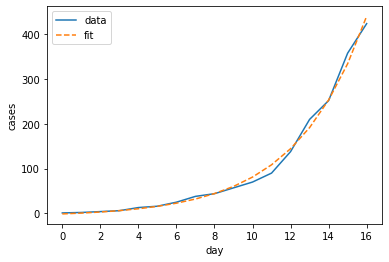

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.plot(x,exponential(x,popt_exp[0],popt_exp[1],popt_exp[2]),'--')
ax.set_xlabel('day')
ax.set_ylabel('cases')
ax.legend(['data', 'fit'])

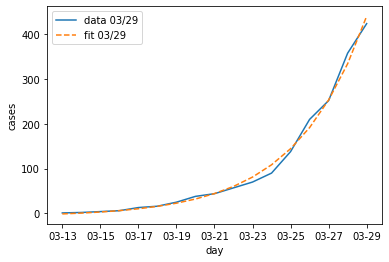

In [21]:
from matplotlib.dates import DateFormatter
fmt_md = DateFormatter("%m-%d")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(near_pgh_summary.index,y)
ax.plot(near_pgh_summary.index,exponential(x,popt_exp[0],popt_exp[1],popt_exp[2]),'--')
ax.xaxis.set_major_formatter(fmt_md)
ax.set_xlabel('day')
ax.set_ylabel('cases')
ax.legend(['data 03/29', 'fit 03/29'])

In [22]:
popt_exp

array([ 5.88802833,  0.27068926, -7.09373754])

#### Predictive Model

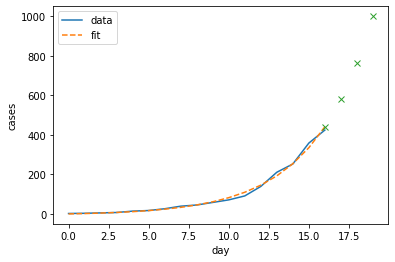

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.plot(x,exponential(x,popt_exp[0],popt_exp[1],popt_exp[2]),'--')
ax.plot(np.arange(16,20),exponential(np.arange(16,20),popt_exp[0],popt_exp[1],popt_exp[2]),'x')
ax.set_xlabel('day')
ax.set_ylabel('cases')
ax.legend(['data', 'fit'])

#### New data check

In [24]:
df2 = pd.read_csv('nyt_data/us-counties_0402.csv', parse_dates=['date'])
pa_only2 = df2[df2['state']=='Pennsylvania'].reset_index(drop=True)
surrounding = ['Beaver', 'Butler', 'Armstrong', 'Westmoreland', 'Allegheny', 'Washington', 'Fayette']
near_pgh2 = pa_only2[pa_only2['county'].isin(surrounding)].reset_index(drop=True)
near_pgh2.drop(columns=['fips'], inplace=True)
near_pgh_summary2 = near_pgh2.groupby(['date']).sum()
near_pgh_summary2.index
near_pgh_summary2.index.freq='D'
near_pgh_summary2.sort_index(inplace=True)

In [25]:
basedate = pd.Timestamp('2020-03-13')

In [26]:
near_pgh_summary2['days_since'] = (near_pgh_summary2.index - basedate).days

In [27]:
westmore = pa_only2[pa_only2['county'].isin(['Westmoreland'])].reset_index(drop=True)

In [28]:
westmore

,date,county,state,fips,cases,deaths
0,2020-03-19,Westmoreland,Pennsylvania,42129.0,2,0
1,2020-03-20,Westmoreland,Pennsylvania,42129.0,4,0
2,2020-03-21,Westmoreland,Pennsylvania,42129.0,4,0
3,2020-03-22,Westmoreland,Pennsylvania,42129.0,5,0
4,2020-03-23,Westmoreland,Pennsylvania,42129.0,6,0
5,2020-03-24,Westmoreland,Pennsylvania,42129.0,11,0
6,2020-03-25,Westmoreland,Pennsylvania,42129.0,16,0
7,2020-03-26,Westmoreland,Pennsylvania,42129.0,24,0
8,2020-03-27,Westmoreland,Pennsylvania,42129.0,30,0
9,2020-03-28,Westmoreland,Pennsylvania,42129.0,41,0


In [77]:
near_pgh_summary2

,cases,deaths,days_since
date,,,
2020-03-13,1,0,0
2020-03-14,2,0,1
2020-03-15,4,0,2
2020-03-16,6,0,3
2020-03-17,13,0,4
2020-03-18,16,0,5
2020-03-19,25,0,6
2020-03-20,38,0,7
2020-03-21,44,1,8


In [30]:
y2 = near_pgh_summary2['cases'].values
x2 = near_pgh_summary2['days_since'].values

In [31]:
x2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

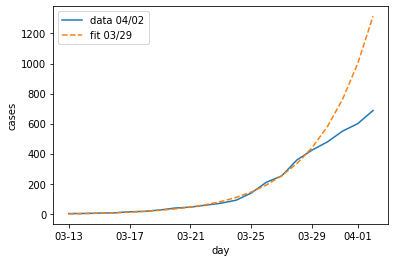

In [32]:
from matplotlib.dates import DateFormatter
fmt_md = DateFormatter("%m-%d")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(near_pgh_summary2.index,y2)
ax.plot(near_pgh_summary2.index,exponential(x2,popt_exp[0],popt_exp[1],popt_exp[2]),'--')
ax.xaxis.set_major_formatter(fmt_md)
ax.set_xlabel('day')
ax.set_ylabel('cases')
ax.legend(['data 04/02', 'fit 03/29'])

### New Fit 04/02 Data

In [34]:
popt_exp2, pcov_exp2 = curve_fit(exponential, x2, y2, p0=[0.2, 0.5, 0.0])

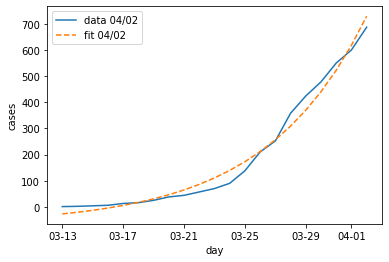

In [36]:
from matplotlib.dates import DateFormatter
fmt_md = DateFormatter("%m-%d")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(near_pgh_summary2.index,y2)
ax.plot(near_pgh_summary2.index,exponential(x2,popt_exp2[0],popt_exp2[1],popt_exp2[2]),'--')
ax.xaxis.set_major_formatter(fmt_md)
ax.set_xlabel('day')
ax.set_ylabel('cases')
ax.legend(['data 04/02', 'fit 04/02'])